In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=12,8

In [5]:
config = pd.read_csv("./config.csv")

In [6]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]


In [7]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
twitterAccount = "tim_cook"

In [9]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [10]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [11]:
df.head()

,Tweet
0,Our Apple family includes hundreds of Dreamers...
1,Love seeing how educators in Australia are usi...
2,"At Apple, we are committed to creating technol..."
3,"During a year unlike any other, photographers ..."
4,"To the coach who teaches us all to be kind, op..."


In [12]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [13]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [14]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [15]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [16]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,Our Apple family includes hundreds of Dreamers...,0.691667,0.450000
1,Love seeing how educators in Australia are usi...,0.300000,0.250000
2,"At Apple, we are committed to creating technol...",0.000000,0.000000
3,"During a year unlike any other, photographers ...",0.658333,0.291667
4,"To the coach who teaches us all to be kind, op...",0.600000,0.466667
5,We’re celebrating 40 years in Singapore — what...,0.000000,0.000000
6,Our hearts are with all those affected by the ...,0.500000,-0.500000
7,"Proud to be supporting , &amp; ’s efforts to ...",0.625000,0.525000
8,Happy Birthday America! Hope everyone has a sa...,0.833333,0.833333
9,Pride is about celebrating the power of equity...,0.300000,1.000000


In [17]:
df = df.drop(df[df['Tweet'] == ''].index)

In [19]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,Our Apple family includes hundreds of Dreamers...,0.691667,0.450000
1,Love seeing how educators in Australia are usi...,0.300000,0.250000
2,"At Apple, we are committed to creating technol...",0.000000,0.000000
3,"During a year unlike any other, photographers ...",0.658333,0.291667
4,"To the coach who teaches us all to be kind, op...",0.600000,0.466667
5,We’re celebrating 40 years in Singapore — what...,0.000000,0.000000
6,Our hearts are with all those affected by the ...,0.500000,-0.500000
7,"Proud to be supporting , &amp; ’s efforts to ...",0.625000,0.525000
8,Happy Birthday America! Hope everyone has a sa...,0.833333,0.833333
9,Pride is about celebrating the power of equity...,0.300000,1.000000


In [20]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [26]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,Our Apple family includes hundreds of Dreamers...,0.691667,0.450000,Positive
1,Love seeing how educators in Australia are usi...,0.300000,0.250000,Positive
2,"At Apple, we are committed to creating technol...",0.000000,0.000000,Neutral
3,"During a year unlike any other, photographers ...",0.658333,0.291667,Positive
4,"To the coach who teaches us all to be kind, op...",0.600000,0.466667,Positive
5,We’re celebrating 40 years in Singapore — what...,0.000000,0.000000,Neutral
6,Our hearts are with all those affected by the ...,0.500000,-0.500000,Negative
7,"Proud to be supporting , &amp; ’s efforts to ...",0.625000,0.525000,Positive
8,Happy Birthday America! Hope everyone has a sa...,0.833333,0.833333,Positive
9,Pride is about celebrating the power of equity...,0.300000,1.000000,Positive


In [27]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

70.0 % of positive tweets


<BarContainer object of 3 artists>

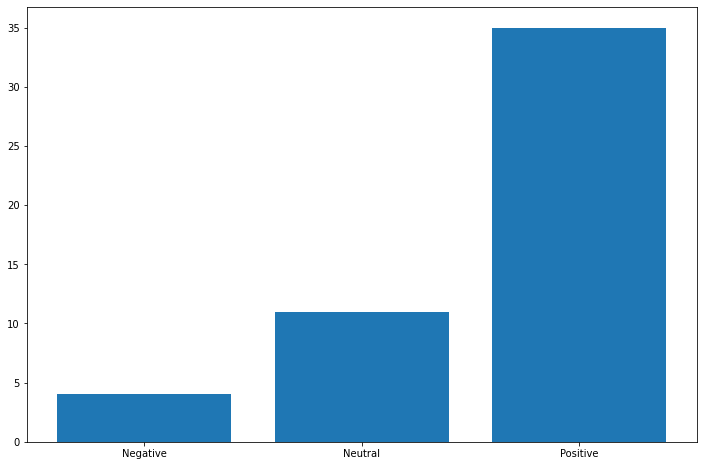

In [28]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

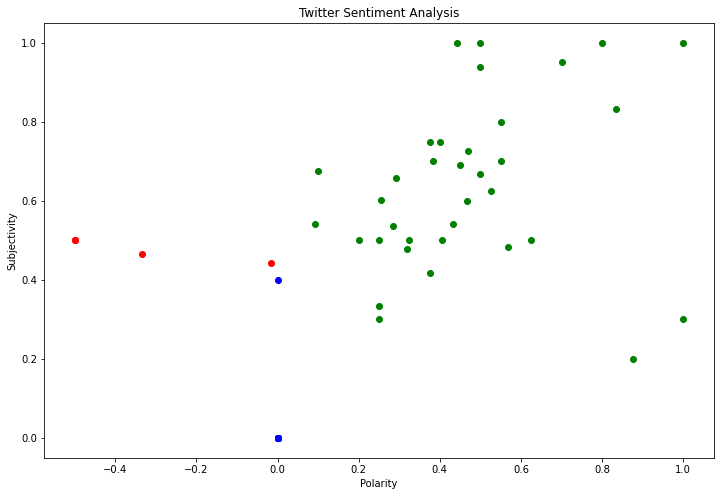

In [29]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [30]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

20.0 % of objective tweets


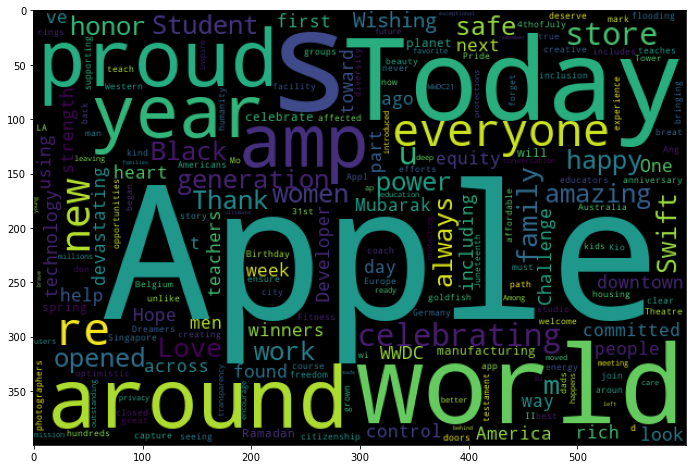

In [31]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()
